# CNN Model using RMSProp

In [23]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)
test_datagen = ImageDataGenerator(
    rescale=1/255,
)

In [3]:
batch_size = 128

In [5]:
train_generator = train_datagen.flow_from_directory("C:/Users/Dell/scraping_image_data/training_images",
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
)
validation_generator = train_datagen.flow_from_directory("C:/Users/Dell/scraping_image_data/validation_images",
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1996 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [8]:
prior = keras.applications.VGG16(
    include_top=False, 
    weights='imagenet',
    input_shape=(48, 48, 3)
)
model = Sequential()
model.add(prior)
model.add(Flatten())
model.add(Dense(256, activation='relu', name='Dense_Intermediate'))
model.add(Dropout(0.1, name='Dropout_Regularization'))
model.add(Dense(3, activation='softmax', name='Output'))


In [9]:
for cnn_block_layer in model.layers[0].layers:
    cnn_block_layer.trainable = False
model.layers[0].trainable = False

In [10]:
model.compile(
    optimizer=RMSprop(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
#checkpoints
checkpoint = ModelCheckpoint(filepath=r'C:\Users\Dell\.keras\models\OPTIMIZERS\RMSProp.h5')

In [16]:
model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator.filenames) // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(train_generator.filenames) // batch_size)

Epoch 1/20
15/15 [==============================] - 73s 5s/step - loss: 0.8833 - accuracy: 0.5776 - val_loss: 0.7162 - val_accuracy: 0.6667
Epoch 2/20
15/15 [==============================] - 57s 4s/step - loss: 0.6371 - accuracy: 0.7136 - val_loss: 0.7950 - val_accuracy: 0.7111
Epoch 3/20
15/15 [==============================] - 57s 4s/step - loss: 0.5834 - accuracy: 0.7266 - val_loss: 0.8594 - val_accuracy: 0.6889
Epoch 4/20
15/15 [==============================] - 55s 4s/step - loss: 0.5426 - accuracy: 0.7506 - val_loss: 0.6883 - val_accuracy: 0.7067
Epoch 5/20
15/15 [==============================] - 55s 4s/step - loss: 0.5225 - accuracy: 0.7682 - val_loss: 0.8655 - val_accuracy: 0.7644
Epoch 6/20
15/15 [==============================] - 56s 4s/step - loss: 0.5058 - accuracy: 0.7612 - val_loss: 0.8545 - val_accuracy: 0.6844
Epoch 7/20
15/15 [==============================] - 56s 4s/step - loss: 0.4892 - accuracy: 0.7698 - val_loss: 0.7645 - val_accuracy: 0.6889
Epoch 8/20
15/15 [==

In [31]:
from keras.applications import VGG16

# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, weights='imagenet')
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [35]:
test_eval = model.evaluate(validation_generator, verbose=0)

In [36]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.6796600222587585
Test accuracy: 0.6666666865348816


In [37]:
sample_training_images, _ = next(train_generator)

In [38]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

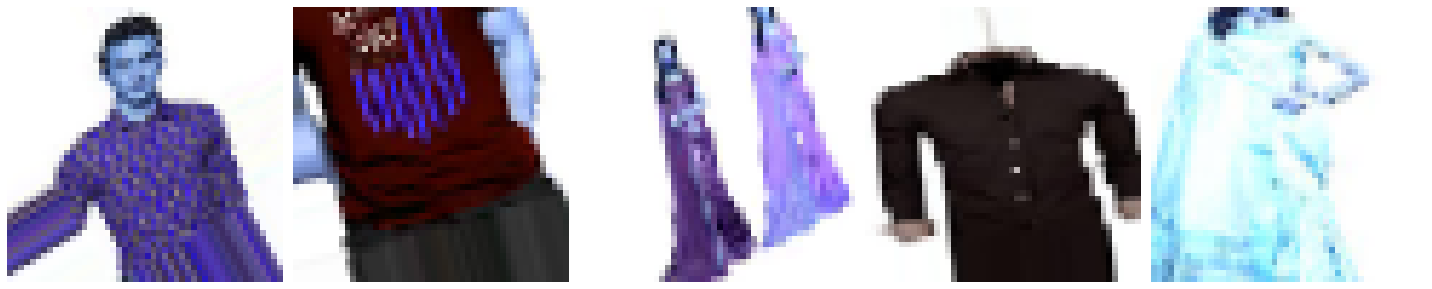

In [39]:
plotImages(sample_training_images[:5])